### Loading the dataset

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('../dataset/uber.csv',usecols=['pickup_datetime','fare_amount','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.shape

(200000, 7)

- Here total 20,0000 rows of data and 7 columns
- `target` column is `fare_amount`

### Check the data info the number of categorical and numerical columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


- Categorical Columns: pickup_datetime(although we will convert this into date-time)
- Numerical Columns: rest of them are numerical columns

In [9]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

- Only `dropoff_longitude` and `dropoff_latitude` one missing values we will drop this row

In [10]:
# Convert pickup_datetime to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
39787,6.0,2013-12-04 20:10:17+00:00,-73.945451,40.774191,-73.959139,40.773367,1
102624,10.1,2010-08-30 17:24:00+00:00,-73.981657,40.779807,-73.981185,40.752817,1
57677,7.5,2015-03-25 08:42:48+00:00,-73.980530,40.765236,-73.992958,40.747993,1
67364,6.5,2014-06-01 20:13:58+00:00,-74.003747,40.723888,-74.015978,40.715913,1
128162,10.5,2014-11-17 23:31:44+00:00,-73.987655,40.775300,-73.950802,40.781356,1


In [11]:
# drop rows with missing values

df.dropna(inplace=True)

In [12]:
df.isnull().sum() 

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


<Axes: >

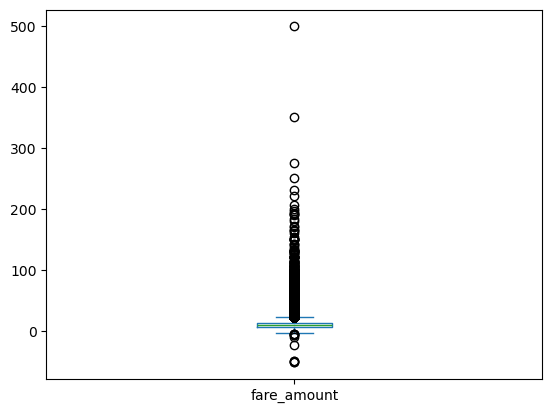

In [19]:
# detect outliers in 'fare_amount' column
df['fare_amount'].plot(kind='box')

In [20]:
# remove outliers
df = df[df['fare_amount'] > 0]

<Axes: >

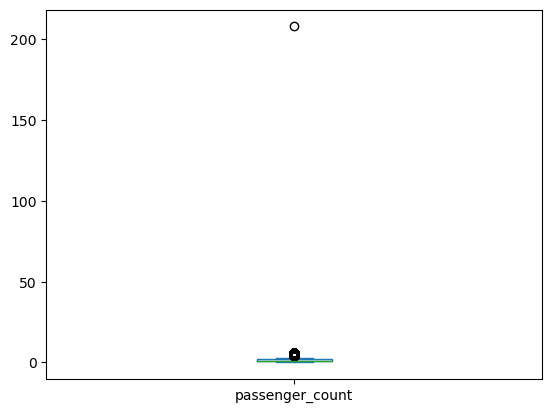

In [21]:
# detect outliers in 'passenger_count' column
df['passenger_count'].plot(kind='box')

In [23]:
df[df['passenger_count'] == df.passenger_count.max()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208


- passanger_count max value is `208` that's crazy so remove the row

In [26]:
df.shape

(199977, 7)

In [27]:
df[df['passenger_count'] < 208].shape

(199976, 7)

In [28]:
df = df[df['passenger_count'] < 208]

### Exploratory Data Analysis

##### Univariate Analysis

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
df.fare_amount.describe()

count    199976.000000
mean         11.362584
std           9.897088
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

<Axes: >

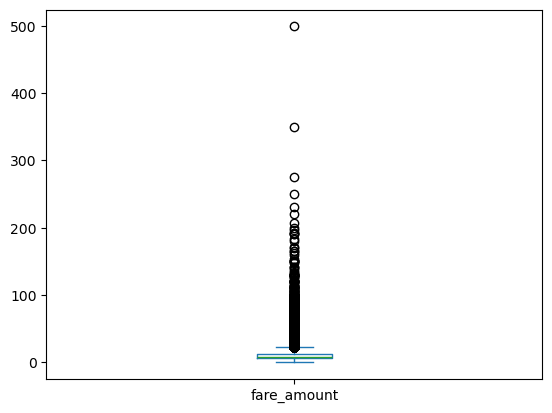

In [32]:
df['fare_amount'].plot(kind='box')

In [33]:
IQR = df.fare_amount.quantile(0.75) - df.fare_amount.quantile(0.25)
lower_bridge = df.fare_amount.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.fare_amount.quantile(0.75) + (IQR * 1.5)
print(lower_bridge), print(upper_bridge)

-3.75
22.25


(None, None)

In [35]:
df[df['fare_amount'] == df.fare_amount.min()].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21658,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1
191228,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1


- Interestingly, from the same point in 2015 and 2010 two trips got occured and the dropoff point is also same and same number of passanger

In [37]:
df.shape

(199976, 7)

In [38]:
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]
df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]

df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]

In [43]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < upper_bridge)]

<Axes: >

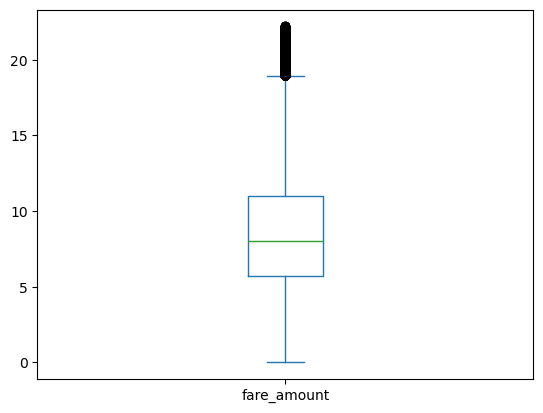

In [44]:
df['fare_amount'].plot(kind='box')

<Axes: ylabel='Frequency'>

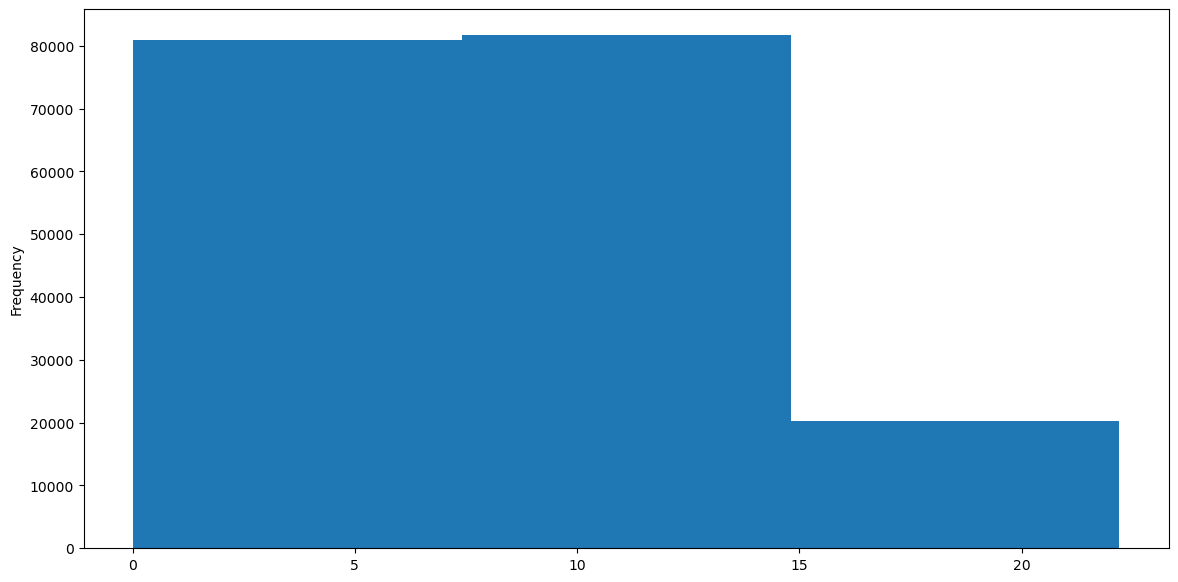

In [45]:
df['fare_amount'].plot(kind='hist',bins=3,figsize=(14,7))

In [46]:
df[df['fare_amount'] == df.fare_amount.min()].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21658,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1
191228,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1


In [48]:
!pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 363.1 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 567.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [49]:
# now calculate the distance between pickup and dropoff points
from geopy.distance import geodesic
def calculate_distance(x):
    return geodesic((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km

df['distance'] = df.apply(lambda x: calculate_distance(x), axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730


In [56]:
import datetime as dt
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x > 4 else 0)
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if x in [7,8,9,16,17,18] else 0)

In [57]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,month,day_of_week,is_weekend,is_rush_hour
fare_amount,1.000000,0.140423,0.000464,-0.000903,-0.000668,0.000265,0.012885,0.002199,-0.013280,0.006802,0.026206,0.020120,0.006792,-0.024458
pickup_datetime,0.140423,1.000000,0.009158,-0.011232,0.008847,-0.010898,0.004763,0.026259,0.003220,-0.000210,0.038942,0.004269,0.009504,-0.012777
pickup_longitude,0.000464,0.009158,1.000000,-0.980257,0.954735,-0.942702,-0.001022,0.158944,0.001989,0.003542,-0.003059,0.000660,-0.001289,0.003485
pickup_latitude,-0.000903,-0.011232,-0.980257,1.000000,-0.942419,0.962277,-0.000541,-0.137910,-0.002188,-0.006852,0.004065,-0.002109,0.000819,-0.002572
dropoff_longitude,-0.000668,0.008847,0.954735,-0.942419,1.000000,-0.980800,-0.000194,0.130591,0.001521,0.002563,-0.001760,0.000199,-0.001616,0.002457
dropoff_latitude,0.000265,-0.010898,-0.942702,0.962277,-0.980800,1.000000,-0.001809,-0.114202,-0.001989,-0.005863,0.003131,-0.001562,0.001387,-0.001928
passenger_count,0.012885,0.004763,-0.001022,-0.000541,-0.000194,-0.001809,1.000000,-0.000809,0.015058,0.002466,0.008828,0.037450,0.042876,-0.022770
distance,0.002199,0.026259,0.158944,-0.137910,0.130591,-0.114202,-0.000809,1.000000,-0.001202,-0.003630,-0.001349,-0.004760,-0.003051,-0.001316
hour,-0.013280,0.003220,0.001989,-0.002188,0.001521,-0.001989,0.015058,-0.001202,1.000000,0.005092,-0.002724,-0.089107,-0.092516,-0.056228
day,0.006802,-0.000210,0.003542,-0.006852,0.002563,-0.005863,0.002466,-0.003630,0.005092,1.000000,-0.016276,0.005484,0.003807,-0.006002


In [60]:
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [61]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,month,day_of_week,is_weekend,is_rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,19,7,5,3,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,20,17,7,4,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,21,24,8,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,8,26,6,4,0,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,17,28,8,3,0,1


In [62]:
df.shape

(182810, 13)

In [78]:
## Now keep everything ready for model building using ColumnTransformer and Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

X = df.drop('fare_amount',axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance', 'hour', 'day', 'month', 'day_of_week']

trf1 = ColumnTransformer([
    ('num', StandardScaler(), slice(0, 12))
])


In [89]:
pipe = Pipeline([
    ('trf1', trf1),
    ('xgb', xgb.XGBRFRegressor())
])

In [90]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('xgb',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None,
                                reg_alpha=None, ...))])

In [91]:
y_pred = pipe.predict(X_test)

In [92]:
y_pred

array([ 5.120652 ,  5.3654056, 11.549299 , ...,  8.325472 ,  7.8906517,
        7.3087845], dtype=float32)

In [93]:
pipe.named_steps

{'trf1': ColumnTransformer(transformers=[('num', StandardScaler(), slice(0, 12, None))]),
 'xgb': XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='reg:squarederror',
                random_state=None, reg_alpha=None, ...)}

In [94]:
mean_squared_error(y_test, y_pred)

5.25301713282384

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.2919461452712713

#### Cross Validation using Pipeline

In [86]:
cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')

array([-5.46246104, -5.3792717 , -5.35065075, -5.53940259, -5.40339209])

In [88]:
np.array([-5.46246104, -5.3792717 , -5.35065075, -5.53940259, -5.40339209]).mean()

-5.427035634

#### GridSearch using Pipeline

In [97]:
from sklearn.model_selection import GridSearchCV

params = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [2, 3, 4]
}

grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X, y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         slice(0, 12, None))])),
                                       ('xgb',
                                        XGBRFRegressor(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None...
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       objective='reg:squarederror',
                                                       random_state=None,
                                                       reg_alpha=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__max_depth': [2, 3, 4],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [98]:
grid.best_params_

{'xgb__max_depth': 4, 'xgb__n_estimators': 200}

In [103]:
pipe = Pipeline([
    ('trf1', trf1),
    ('xgb', xgb.XGBRFRegressor())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('xgb',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None,
                                reg_alpha=None, ...))])

In [104]:
y_pred = pipe.predict(X_test)

In [105]:
mean_squared_error(y_test, y_pred)

5.25301713282384

In [106]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.2919461452712713

In [107]:
# now save the model
import pickle
pickle.dump(pipe, open('../models/model_xgb.pkl','wb'))

In [108]:
# load the model
model = pickle.load(open('../models/model_xgb.pkl','rb'))

In [109]:
# now take a sample data and predict the fare amount
# pickup_datetime	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	passenger_count
pickup_datetime = '2012-04-21 08:30:00'
pickup_longitude = -73.987130
pickup_latitude = 40.732029
dropoff_longitude = -73.991875
dropoff_latitude = 40.74942
passenger_count = 1

# need to make this: pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	passenger_count	distance	hour	day	month	day_of_week	is_weekend	is_rush_hour
data = {'pickup_datetime':pickup_datetime, 'pickup_longitude':pickup_longitude, 'pickup_latitude':pickup_latitude, 'dropoff_longitude':dropoff_longitude, 'dropoff_latitude':dropoff_latitude, 'passenger_count':passenger_count}
df = pd.DataFrame(data, index=[0])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['distance'] = df.apply(lambda x: calculate_distance(x), axis=1)
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x > 4 else 0)
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if x in [7,8,9,16,17,18] else 0)
df.drop(['pickup_datetime'],axis=1,inplace=True)
df


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,month,day_of_week,is_weekend,is_rush_hour
0,-73.98713,40.732029,-73.991875,40.74942,1,1.972399,8,21,4,5,1,1


In [110]:
# predict the fare amount
fare_amount = model.predict(df)
fare_amount

array([8.338475], dtype=float32)